In [1]:
from random import random

import jiwer
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
metric_funcs = {
    'cer': jiwer.cer,
    'mer': jiwer.mer,
    'wer': jiwer.wer,
    'wil': jiwer.wil,
    'wip': jiwer.wip,
}

In [3]:
transforms = jiwer.Compose(
    [
        jiwer.ExpandCommonEnglishContractions(),
        jiwer.RemoveEmptyStrings(),
        jiwer.ToLowerCase(),
        jiwer.RemoveMultipleSpaces(),
        jiwer.Strip(),
        jiwer.RemovePunctuation(),
        jiwer.ReduceToListOfListOfWords(),
    ]
)

In [4]:
prompts = pd.read_csv('../my_tests/prompts.csv', index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: '../my_tests/prompts.csv'

In [5]:
def calc_metrics(row):
    m = {}
    for metric_name, metric_func in metric_funcs.items():
        m[metric_name] = metric_func(
            row['prompt'],
            row['transcription'],
            truth_transform=transforms,
            hypothesis_transform=transforms,
        )
        
    return pd.Series(m)

# lgspeach_fn_metrics

In [4]:
prompts = pd.read_csv('../data/my_tests/prompts.csv', index_col=0)

In [6]:
from pathlib import Path

path = Path('../data/my_tests/metrics')
files = list(path.glob('*-metrics*.csv'))
files

[WindowsPath('../data/my_tests/metrics/base_xtts_v2-vp-metrics-3.csv.csv'),
 WindowsPath('../data/my_tests/metrics/best-lg-asr-lg-metrics-3.csv'),
 WindowsPath('../data/my_tests/metrics/best-lg-asr-vp-metrics-3.csv.csv'),
 WindowsPath('../data/my_tests/metrics/best-lg-lg-metrics.csv'),
 WindowsPath('../data/my_tests/metrics/best-lg-vp-metrics-1.csv'),
 WindowsPath('../data/my_tests/metrics/best-lg-vp-metrics-2.csv.csv'),
 WindowsPath('../data/my_tests/metrics/best-lg-vp-metrics-3.csv.csv'),
 WindowsPath('../data/my_tests/metrics/best-vp-lg-metrics.csv'),
 WindowsPath('../data/my_tests/metrics/best-vp-vp-metrics-1.csv'),
 WindowsPath('../data/my_tests/metrics/best-vp-vp-metrics-3.csv.csv'),
 WindowsPath('../data/my_tests/metrics/best-vp-vp-metrics.csv'),
 WindowsPath('../data/my_tests/metrics/last-lg-asr-lg-metrics-3.csv'),
 WindowsPath('../data/my_tests/metrics/last-lg-asr-vp-metrics-3.csv.csv'),
 WindowsPath('../data/my_tests/metrics/last-lg-lg-metrics.csv'),
 WindowsPath('../data/my_

In [7]:
df = []
for file in files:
    _df = pd.read_csv(file)
    df.append(_df)
    
df = pd.concat(df)
df

,prompt_id,speaker_id,gen,model_name,cer,mer,wer,wil,wip,ref_secs,secs,utmos,prompt,transcription
0,0,28266,0,base_xtts_v2,0.090909,0.090909,0.090909,0.173554,0.826446,0.673831,0.041405,2.452250,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
1,0,28266,1,base_xtts_v2,0.000000,0.000000,0.000000,0.000000,1.000000,0.673831,0.067236,2.434642,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
2,0,28266,2,base_xtts_v2,0.000000,0.000000,0.000000,0.000000,1.000000,0.673831,0.129138,2.644831,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
3,0,28266,3,base_xtts_v2,0.000000,0.000000,0.000000,0.000000,1.000000,0.673831,0.084537,2.495353,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
4,0,28266,4,base_xtts_v2,0.000000,0.000000,0.000000,0.000000,1.000000,0.673831,0.096144,2.530625,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,109,1898,5,last-vp-fn,6.000000,1.000000,6.000000,1.000000,0.000000,0.867727,0.363204,2.411777,Listen,This scene is the visual amortization.
2196,109,1898,6,last-vp-fn,3.000000,0.750000,3.000000,0.750000,0.250000,0.867727,0.374457,2.654524,Listen,Listen our future wishes.
2197,109,1898,7,last-vp-fn,11.000000,1.000000,11.000000,1.000000,0.000000,0.867727,0.412469,1.855828,Listen,"I sain en avissa pa' oma odeseti, dios saun, ..."
2198,109,1898,8,last-vp-fn,1.000000,1.000000,1.000000,1.000000,0.000000,0.867727,0.396459,2.360940,Listen,បបបបបបបបបបបបបបបបបបបបបបបបបបបបបបបបបបបបបបបបបបបបប...


In [5]:
df['model_name'].unique()

array(['best-lg-fn', 'best-vp-fn', 'last-vp-fn', 'last-lg-fn'],
      dtype=object)

In [8]:
df['prompt_len'] = df['prompt'].apply(len)

TypeError: object of type 'float' has no len()

In [9]:
grouped_df = df.groupby(['prompt_id', 'speaker_id', 'model_name'])[['cer', 'mer', 'wer', 'wil', 'wip', 'ref_secs', 'secs', 'utmos']].mean()

In [10]:
grouped_df

cer       mer        wer       wil  \
prompt_id speaker_id model_name                                                 
0         1898       best-lg-fn       0.000000  0.000000   0.000000  0.000000   
                     best-vp-fn       0.027273  0.025000   0.027273  0.038636   
                     last-lg-fn       0.018182  0.018182   0.018182  0.026364   
                     last-vp-fn       0.009091  0.009091   0.009091  0.017355   
          4525       best-lg-fn       0.000000  0.000000   0.000000  0.000000   
...                                        ...       ...        ...       ...   
109       lg_speaker best-lg-fn       8.400000  0.808247   8.400000  0.808247   
                     best-vp-fn       9.800000  0.945972   9.800000  0.945972   
                     last-lg-asr-fn   2.200000  0.461111   2.200000  0.461111   
                     last-lg-fn       0.200000  0.100000   0.200000  0.100000   
                     last-vp-fn      10.400000  0.952381  10.400000  0.952381   

                                          wip  ref_secs      secs     utmos  
prompt_id speaker_id model_name                                              
0         1898       best-lg-fn      1.000000  0.867727  0.436522  3.793004  
                     best-vp-fn      0.961364  0.867727  0.467792  3.210571  
                     last-lg-fn      0.973636  0.867727  0.432508  3.888656  
                     last-vp-fn      0.982645  0.867727  0.473295  3.283682  
          4525       best-lg-fn      1.000000  0.751548  0.363917  3.442126  
...                                       ...       ...       ...       ...  
109       lg_speaker best-lg-fn      0.191753  0.808919  0.315824  3.002744  
                     best-vp-fn      0.054028  0.742531  0.288025  2.782206  
                     last-lg-asr-fn  0.538889  0.821711  0.160885  3.619839  
                     last-lg-fn      0.900000  0.808919  0.142707  3.958013  
                     last-vp-fn      0.047619  0.742531  0.224273  2.692371  

[3740 rows x 8 columns]

In [15]:
print(grouped_df.mean())

cer         0.947482
mer         0.193108
wer         0.947482
wil         0.219124
wip         0.780876
ref_secs    0.751585
secs        0.273986
utmos       2.875593
dtype: float64


In [11]:
grouped_df.groupby(level=[1, 2]).mean()#.swaplevel(0, 1)

cer       mer       wer       wil       wip  \
speaker_id model_name                                                         
1898       best-lg-fn      0.490419  0.095992  0.490419  0.107683  0.892317   
           best-vp-fn      2.998719  0.357010  2.998719  0.384444  0.615556   
           last-lg-fn      0.055123  0.040942  0.055123  0.055434  0.944566   
           last-vp-fn      2.574890  0.358073  2.574890  0.386569  0.613431   
4525       best-lg-fn      0.274023  0.122302  0.274023  0.140036  0.859964   
           last-lg-fn      0.105118  0.067505  0.105118  0.086916  0.913084   
           last-vp-fn      1.165944  0.268364  1.165944  0.303411  0.696589   
28266      base_xtts_v2    0.266171  0.120523  0.266171  0.155793  0.844207   
           best-lg-asr-fn  0.936931  0.200191  0.936931  0.217600  0.782400   
           best-lg-fn      0.127956  0.073763  0.127956  0.093134  0.906866   
           best-vp-fn      1.270402  0.324288  1.270402  0.372413  0.627587   
           last-lg-asr-fn  0.334209  0.120227  0.334209  0.143051  0.856949   
           last-lg-fn      0.093761  0.059185  0.093761  0.082712  0.917288   
           last-vp-fn      1.283707  0.320741  1.283707  0.367143  0.632857   
96892      best-lg-fn      0.093755  0.064569  0.093755  0.085294  0.914706   
           best-vp-fn      1.034265  0.400618  1.034265  0.457384  0.542616   
           last-lg-fn      0.073366  0.065579  0.073366  0.091202  0.908798   
           last-vp-fn      1.362555  0.488101  1.362555  0.554505  0.445495   
124706     base_xtts_v2    0.367670  0.080646  0.367670  0.105401  0.894599   
           best-lg-asr-fn  1.501315  0.215654  1.501315  0.232962  0.767038   
           best-lg-fn      0.269994  0.104459  0.269994  0.121833  0.878167   
           best-vp-fn      3.258485  0.386559  3.258485  0.422533  0.577467   
           last-lg-asr-fn  0.859393  0.144036  0.859393  0.162380  0.837620   
           last-lg-fn      0.088157  0.068515  0.088157  0.089355  0.910645   
           last-vp-fn      2.756946  0.371380  2.756946  0.410136  0.589864   
197469     best-lg-fn      0.385064  0.117376  0.385064  0.129616  0.870384   
           last-lg-fn      0.058117  0.047816  0.058117  0.066646  0.933354   
           last-vp-fn      1.553620  0.301316  1.553620  0.331908  0.668092   
lg_speaker best-lg-asr-fn  1.932157  0.259238  1.932157  0.270483  0.729517   
           best-lg-fn      0.559562  0.144783  0.559562  0.156458  0.843542   
           best-vp-fn      1.568060  0.277066  1.568060  0.305830  0.694170   
           last-lg-asr-fn  0.643795  0.159860  0.643795  0.172541  0.827459   
           last-lg-fn      0.077539  0.054718  0.077539  0.071092  0.928908   
           last-vp-fn      1.793214  0.284264  1.793214  0.316322  0.683678   

                           ref_secs      secs     utmos  
speaker_id model_name                                    
1898       best-lg-fn      0.867727  0.369973  3.520504  
           best-vp-fn      0.867727  0.398274  2.757729  
           last-lg-fn      0.867727  0.361311  3.642901  
           last-vp-fn      0.867727  0.419270  2.816097  
4525       best-lg-fn      0.751548  0.317303  3.196622  
           last-lg-fn      0.741726  0.317407  3.261917  
           last-vp-fn      0.751548  0.269918  2.783525  
28266      base_xtts_v2    0.673831  0.107623  2.232025  
           best-lg-asr-fn  0.673831  0.164258  2.587430  
           best-lg-fn      0.673831  0.152560  2.774063  
           best-vp-fn      0.673831  0.119116  2.034189  
           last-lg-asr-fn  0.673831  0.126013  2.638391  
           last-lg-fn      0.673831  0.116547  2.631671  
           last-vp-fn      0.673831  0.157144  1.965567  
96892      best-lg-fn      0.744394  0.095419  2.543420  
           best-vp-fn      0.744394  0.121873  1.732898  
           last-lg-fn      0.744394  0.119319  2.620603  
           last-vp-fn      0.744394  0.168777  1.510739  
124706     base_xtts_v2    

In [27]:
list(path.glob('best-vp*.csv'))

[WindowsPath('../data/my_tests/metrics/best-vp-lg-metrics.csv'),
 WindowsPath('../data/my_tests/metrics/best-vp-vp-metrics-1.csv'),
 WindowsPath('../data/my_tests/metrics/best-vp-vp-metrics.csv')]

In [28]:
best_vp = pd.concat([pd.read_csv(file) for file in list(path.glob('best-vp*.csv'))], axis=0)
best_vp

,prompt_id,speaker_id,gen,model_name,cer,mer,wer,wil,wip,ref_secs,secs,utmos,prompt,transcription
0,0,lg_speaker,0,best-vp-fn,0.0,0.000000,0.0,0.000000,1.000000,0.742531,0.375243,3.869976,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
1,0,lg_speaker,1,best-vp-fn,0.0,0.000000,0.0,0.000000,1.000000,0.742531,0.354673,3.955776,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
2,0,lg_speaker,2,best-vp-fn,0.0,0.000000,0.0,0.000000,1.000000,0.742531,0.363082,3.755200,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
3,0,lg_speaker,3,best-vp-fn,0.0,0.000000,0.0,0.000000,1.000000,0.742531,0.394092,4.058067,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
4,0,lg_speaker,4,best-vp-fn,0.0,0.000000,0.0,0.000000,1.000000,0.742531,0.374799,3.333624,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,109,1898,5,best-vp-fn,38.0,1.000000,38.0,1.000000,0.000000,0.867727,0.331354,1.574132,Listen,"Ето няма лися всня, ааааааааааааааааааааааааа..."
2196,109,1898,6,best-vp-fn,1.0,1.000000,1.0,1.000000,0.000000,0.867727,0.339968,2.217057,Listen,ḴḴḴḴḴḴḴḴḴḴḴḴḴḴḴḴḴḴḴḴḴḴḴḴḴḴḴḴḴḴḴḴḴḴḴḴḴḴḴḴḴḴḴḴḴ...
2197,109,1898,7,best-vp-fn,7.0,0.875000,7.0,0.875000,0.125000,0.867727,0.345186,2.251203,Listen,"Listen on this one thing, this is my..."
2198,109,1898,8,best-vp-fn,11.0,0.916667,11.0,0.916667,0.083333,0.867727,0.353093,2.050144,Listen,"Listen, this is an end of monument with some ..."


In [30]:
best_vp['model_name'] = 'best-vp-fn'

In [33]:
best_vp.to_csv('../data/my_tests/metrics/sorted_metrics/best-vp-metrics.csv', index=False)

In [34]:
last_vp = pd.concat([pd.read_csv(file) for file in list(path.glob('last-vp*.csv'))], axis=0)
last_vp

,prompt_id,speaker_id,gen,model_name,cer,mer,wer,wil,wip,ref_secs,secs,utmos,prompt,transcription
0,0,lg_speaker,0,last-vp-fn,0.0,0.00,0.0,0.00,1.00,0.742531,0.336253,3.612261,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
1,0,lg_speaker,1,last-vp-fn,0.0,0.00,0.0,0.00,1.00,0.742531,0.340150,3.703339,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
2,0,lg_speaker,2,last-vp-fn,0.0,0.00,0.0,0.00,1.00,0.742531,0.349836,3.831563,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
3,0,lg_speaker,3,last-vp-fn,0.0,0.00,0.0,0.00,1.00,0.742531,0.281388,3.113769,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
4,0,lg_speaker,4,last-vp-fn,0.0,0.00,0.0,0.00,1.00,0.742531,0.295734,3.941329,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,109,1898,5,last-vp-fn,6.0,1.00,6.0,1.00,0.00,0.867727,0.363204,2.411777,Listen,This scene is the visual amortization.
2196,109,1898,6,last-vp-fn,3.0,0.75,3.0,0.75,0.25,0.867727,0.374457,2.654524,Listen,Listen our future wishes.
2197,109,1898,7,last-vp-fn,11.0,1.00,11.0,1.00,0.00,0.867727,0.412469,1.855828,Listen,"I sain en avissa pa' oma odeseti, dios saun, ..."
2198,109,1898,8,last-vp-fn,1.0,1.00,1.0,1.00,0.00,0.867727,0.396459,2.360940,Listen,បបបបបបបបបបបបបបបបបបបបបបបបបបបបបបបបបបបបបបបបបបបបប...


In [37]:
last_vp.to_csv('../data/my_tests/metrics/sorted_metrics/last-vp-metrics.csv', index=False)

In [7]:
last_lg = pd.concat([pd.read_csv(file) for file in list(path.glob('last-lg*.csv'))], axis=0)
last_lg

,prompt_id,speaker_id,gen,model_name,cer,mer,wer,wil,wip,ref_secs,secs,utmos,prompt,transcription
0,0,lg_speaker,0,last-lg-fn,0.0,0.0,0.0,0.0,1.0,0.808919,0.416110,4.198778,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
1,0,lg_speaker,1,last-lg-fn,0.0,0.0,0.0,0.0,1.0,0.808919,0.398321,3.593138,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
2,0,lg_speaker,2,last-lg-fn,0.0,0.0,0.0,0.0,1.0,0.808919,0.386882,3.878228,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
3,0,lg_speaker,3,last-lg-fn,0.0,0.0,0.0,0.0,1.0,0.808919,0.366522,3.818954,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
4,0,lg_speaker,4,last-lg-fn,0.0,0.0,0.0,0.0,1.0,0.808919,0.378325,3.733661,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,109,197469,5,last-lg-fn,0.0,0.0,0.0,0.0,1.0,0.867635,0.224944,3.457278,Listen,Listen.
2196,109,197469,6,last-lg-fn,0.0,0.0,0.0,0.0,1.0,0.867635,0.253359,3.841860,Listen,Listen.
2197,109,197469,7,last-lg-fn,0.0,0.0,0.0,0.0,1.0,0.867635,0.111674,4.158488,Listen,Listen.
2198,109,197469,8,last-lg-fn,0.0,0.0,0.0,0.0,1.0,0.867635,0.091770,4.090439,Listen,Listen.


In [8]:
list(path.glob('last-lg*.csv'))

[WindowsPath('../data/my_tests/metrics/last-lg-lg-metrics.csv'),
 WindowsPath('../data/my_tests/metrics/last-lg-vp-metrics-1.csv'),
 WindowsPath('../data/my_tests/metrics/last-lg-vp-metrics-2.csv.csv'),
 WindowsPath('../data/my_tests/metrics/last-lg-vp-metrics.csv')]

In [13]:
last_lg['model_name'].unique()

array(['last-lg-fn'], dtype=object)

In [16]:
last_lg = last_lg.drop_duplicates(subset=['model_name', 'prompt_id', 'speaker_id', 'gen'])

In [17]:
last_lg.to_csv('../data/my_tests/metrics/sorted_metrics/last-lg-metrics.csv', index=False)

In [10]:
best_lg = pd.concat([pd.read_csv(file) for file in list(path.glob('best-lg*.csv'))], axis=0)
best_lg

,prompt_id,speaker_id,gen,model_name,cer,mer,wer,wil,wip,ref_secs,secs,utmos,prompt,transcription
0,0,lg_speaker,0,best-lg-fn,0.0,0.0,0.0,0.0,1.0,0.808919,0.401311,4.025373,NaN,NaN
1,0,lg_speaker,1,best-lg-fn,0.0,0.0,0.0,0.0,1.0,0.808919,0.413334,3.954408,NaN,NaN
2,0,lg_speaker,2,best-lg-fn,0.0,0.0,0.0,0.0,1.0,0.808919,0.412399,4.161222,NaN,NaN
3,0,lg_speaker,3,best-lg-fn,0.0,0.0,0.0,0.0,1.0,0.808919,0.402482,3.932466,NaN,NaN
4,0,lg_speaker,4,best-lg-fn,0.0,0.0,0.0,0.0,1.0,0.808919,0.427115,4.268362,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,109,1898,5,best-lg-fn,0.0,0.0,0.0,0.0,1.0,0.867727,0.281931,3.874667,Listen,Listen.
2196,109,1898,6,best-lg-fn,0.0,0.0,0.0,0.0,1.0,0.867727,0.411924,3.445709,Listen,Listen!
2197,109,1898,7,best-lg-fn,0.0,0.0,0.0,0.0,1.0,0.867727,0.199685,2.920048,Listen,Listen...
2198,109,1898,8,best-lg-fn,0.0,0.0,0.0,0.0,1.0,0.867727,0.317897,4.226886,Listen,Listen.


In [11]:
list(path.glob('best-lg*.csv'))

[WindowsPath('../data/my_tests/metrics/best-lg-lg-metrics.csv'),
 WindowsPath('../data/my_tests/metrics/best-lg-vp-metrics-1.csv'),
 WindowsPath('../data/my_tests/metrics/best-lg-vp-metrics-2.csv.csv')]

In [12]:
best_lg['speaker_id'].unique()

array(['lg_speaker', 197469, 4525, 96892, 1898], dtype=object)

In [19]:
best_lg.to_csv('../data/my_tests/metrics/sorted_metrics/best-lg-metrics.csv', index=False)

In [22]:
g = pd.read_csv('../data/my_tests/metrics/base-lg-metrics.csv')
f = pd.read_csv('../data/my_tests/metrics/base-vp-metrics.csv')
k = pd.read_csv('../data/my_tests/metrics/base-vp-metrics-1.csv')
base_model = pd.concat([g, f, k], axis=0)

In [24]:
base_model['model_name'].unique()

array(['base_xtts_v2'], dtype=object)

In [78]:
base_model.to_csv('../data/my_tests/metrics/sorted_metrics/base-metrics.csv', index=False)

In [70]:
last_lg = pd.read_csv('../data/my_tests/metrics/sorted_metrics/last-lg-metrics.csv')
best_lg = pd.read_csv('../data/my_tests/metrics/sorted_metrics/best-lg-metrics.csv')
last_vp = pd.read_csv('../data/my_tests/metrics/sorted_metrics/last-vp-metrics.csv')
best_vp = pd.read_csv('../data/my_tests/metrics/sorted_metrics/best-vp-metrics.csv')
base_model = pd.read_csv('../data/my_tests/metrics/sorted_metrics/base-metrics.csv')

In [43]:
u_df = pd.concat([pd.read_csv(file) for file in list(path.glob('*3*.csv'))], axis=0)
u_df

,prompt_id,speaker_id,gen,model_name,cer,mer,wer,wil,wip,ref_secs,secs,utmos,prompt,transcription
0,0,lg_speaker,0,best-lg-asr-fn,0.0,0.000000,0.0,0.000000,1.000000,0.821711,0.422336,3.672231,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
1,0,lg_speaker,1,best-lg-asr-fn,0.0,0.000000,0.0,0.000000,1.000000,0.821711,0.425379,4.097851,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
2,0,lg_speaker,2,best-lg-asr-fn,0.0,0.000000,0.0,0.000000,1.000000,0.821711,0.375038,3.960383,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
3,0,lg_speaker,3,best-lg-asr-fn,0.0,0.000000,0.0,0.000000,1.000000,0.821711,0.390251,4.349081,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
4,0,lg_speaker,4,best-lg-asr-fn,0.0,0.000000,0.0,0.000000,1.000000,0.821711,0.391201,4.336899,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,109,124706,5,last-vp-fn,7.0,0.875000,7.0,0.875000,0.125000,0.687884,0.487588,1.893457,Listen,"Listen, I will not let you in again."
2196,109,124706,6,last-vp-fn,5.0,0.833333,5.0,0.833333,0.166667,0.687884,0.520606,2.480138,Listen,"Listen, there are missing working just."
2197,109,124706,7,last-vp-fn,5.0,1.000000,5.0,1.000000,0.000000,0.687884,0.421810,2.537633,Listen,Let's see what happens.
2198,109,124706,8,last-vp-fn,1.0,1.000000,1.0,1.000000,0.000000,0.687884,0.500156,2.048660,Listen,ḍḤḤḤḤḤḤḤḤḤḤḤḤḤḤḤḤḤḤḤḤḤḤḤḤḤḤḤḤḤḤḤḤḤḤḤḤḤḤḤḤḤḤḤḤ...


In [46]:
u_df\
    .groupby(['prompt_id', 'speaker_id', 'model_name'])[['cer', 'mer', 'wer', 'wil', 'wip', 'ref_secs', 'secs', 'utmos']].mean()\
    .groupby(level=[2, 1]).mean()

cer       mer       wer       wil       wip  \
model_name     speaker_id                                                     
best-lg-asr-fn 28266       0.936931  0.200191  0.936931  0.217600  0.782400   
               124706      1.501315  0.215654  1.501315  0.232962  0.767038   
               lg_speaker  1.932157  0.259238  1.932157  0.270483  0.729517   
best-lg-fn     28266       0.127956  0.073763  0.127956  0.093134  0.906866   
               124706      0.269994  0.104459  0.269994  0.121833  0.878167   
best-vp-fn     28266       1.270402  0.324288  1.270402  0.372413  0.627587   
               124706      3.258485  0.386559  3.258485  0.422533  0.577467   
last-lg-asr-fn 28266       0.334209  0.120227  0.334209  0.143051  0.856949   
               124706      0.859393  0.144036  0.859393  0.162380  0.837620   
               lg_speaker  0.643795  0.159860  0.643795  0.172541  0.827459   
last-lg-fn     28266       0.093761  0.059185  0.093761  0.082712  0.917288   
               124706      0.088157  0.068515  0.088157  0.089355  0.910645   
last-vp-fn     28266       1.283707  0.320741  1.283707  0.367143  0.632857   
               124706      2.756946  0.371380  2.756946  0.410136  0.589864   

                           ref_secs      secs     utmos  
model_name     speaker_id                                
best-lg-asr-fn 28266       0.673831  0.164258  2.587430  
               124706      0.687884  0.404626  2.955813  
               lg_speaker  0.821711  0.394279  3.588090  
best-lg-fn     28266       0.673831  0.152560  2.774063  
               124706      0.687884  0.387055  3.040419  
best-vp-fn     28266       0.673831  0.119116  2.034189  
               124706      0.687884  0.469689  2.628283  
last-lg-asr-fn 28266       0.673831  0.126013  2.638391  
               124706      0.687884  0.407416  3.075014  
               lg_speaker  0.821711  0.353467  3.649984  
last-lg-fn     28266       0.673831  0.116547  2.631671  
               124706      0.687884  0.388808  3.071578  
last-vp-fn     28266       0.673831  0.157144  1.965567  
               124706      0.687884  0.472855  2.465758

In [47]:
last_lg = pd.concat([last_lg, u_df[u_df['model_name'] == 'last-lg-fn']])
best_lg = pd.concat([best_lg, u_df[u_df['model_name'] == 'best-lg-fn']])
last_vp = pd.concat([last_vp, u_df[u_df['model_name'] == 'last-vp-fn']])
best_vp = pd.concat([best_vp, u_df[u_df['model_name'] == 'best-vp-fn']])

In [53]:
last_lg.to_csv('../data/my_tests/metrics/sorted_metrics/last-lg-metrics.csv', index=False)
best_lg.to_csv('../data/my_tests/metrics/sorted_metrics/best-lg-metrics.csv', index=False)
last_vp.to_csv('../data/my_tests/metrics/sorted_metrics/last-vp-metrics.csv', index=False)
best_vp.to_csv('../data/my_tests/metrics/sorted_metrics/best-vp-metrics.csv', index=False)

In [58]:
last_lg_asr = u_df[u_df['model_name'] == 'last-lg-asr-fn']
best_lg_asr = u_df[u_df['model_name'] == 'best-lg-asr-fn']

In [60]:
last_lg_asr.to_csv('../data/my_tests/metrics/sorted_metrics/last-lg-asr-metrics.csv', index=False)
best_lg_asr.to_csv('../data/my_tests/metrics/sorted_metrics/best-lg-asr-metrics.csv', index=False)

In [61]:
last_lg_asr = pd.read_csv('../data/my_tests/metrics/sorted_metrics/last-lg-asr-metrics.csv')
best_lg_asr = pd.read_csv('../data/my_tests/metrics/sorted_metrics/best-lg-asr-metrics.csv')

In [71]:
u_base = pd.read_csv('../data/my_tests/metrics/base_xtts_v2-vp-metrics-3.csv.csv')
u_base

,prompt_id,speaker_id,gen,model_name,cer,mer,wer,wil,wip,ref_secs,secs,utmos,prompt,transcription
0,0,28266,0,base_xtts_v2,0.090909,0.090909,0.090909,0.173554,0.826446,0.673831,0.041405,2.452250,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
1,0,28266,1,base_xtts_v2,0.000000,0.000000,0.000000,0.000000,1.000000,0.673831,0.067236,2.434642,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
2,0,28266,2,base_xtts_v2,0.000000,0.000000,0.000000,0.000000,1.000000,0.673831,0.129138,2.644831,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
3,0,28266,3,base_xtts_v2,0.000000,0.000000,0.000000,0.000000,1.000000,0.673831,0.084537,2.495353,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
4,0,28266,4,base_xtts_v2,0.000000,0.000000,0.000000,0.000000,1.000000,0.673831,0.096144,2.530625,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,109,124706,5,base_xtts_v2,1.000000,0.500000,1.000000,0.500000,0.500000,0.687884,0.173784,2.345584,Listen,Listen up!
2196,109,124706,6,base_xtts_v2,0.000000,0.000000,0.000000,0.000000,1.000000,0.687884,0.199951,3.110536,Listen,LISTEN!
2197,109,124706,7,base_xtts_v2,1.000000,1.000000,1.000000,1.000000,0.000000,0.687884,0.165600,2.012342,Listen,lesson.
2198,109,124706,8,base_xtts_v2,0.000000,0.000000,0.000000,0.000000,1.000000,0.687884,0.222105,3.267216,Listen,Listen!


In [72]:
base_model = pd.concat([base_model, u_base], axis=0)
base_model

,prompt_id,speaker_id,gen,model_name,cer,mer,wer,wil,wip,ref_secs,secs,utmos,prompt,transcription
0,0,lg_speaker,0,base_xtts_v2,0.0,0.0,0.0,0.0,1.0,0.808919,0.363239,4.341491,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
1,0,lg_speaker,1,base_xtts_v2,0.0,0.0,0.0,0.0,1.0,0.808919,0.377264,4.316709,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
2,0,lg_speaker,2,base_xtts_v2,0.0,0.0,0.0,0.0,1.0,0.808919,0.380751,4.026340,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
3,0,lg_speaker,3,base_xtts_v2,0.0,0.0,0.0,0.0,1.0,0.808919,0.383324,4.099718,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
4,0,lg_speaker,4,base_xtts_v2,0.0,0.0,0.0,0.0,1.0,0.808919,0.365881,4.071450,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,109,124706,5,base_xtts_v2,1.0,0.5,1.0,0.5,0.5,0.687884,0.173784,2.345584,Listen,Listen up!
2196,109,124706,6,base_xtts_v2,0.0,0.0,0.0,0.0,1.0,0.687884,0.199951,3.110536,Listen,LISTEN!
2197,109,124706,7,base_xtts_v2,1.0,1.0,1.0,1.0,0.0,0.687884,0.165600,2.012342,Listen,lesson.
2198,109,124706,8,base_xtts_v2,0.0,0.0,0.0,0.0,1.0,0.687884,0.222105,3.267216,Listen,Listen!


In [73]:
df = pd.concat([
    last_lg,
    last_vp,
    best_lg,
    best_vp,
    base_model,
    last_lg_asr,
    best_lg_asr,
])
df

,prompt_id,speaker_id,gen,model_name,cer,mer,wer,wil,wip,ref_secs,secs,utmos,prompt,transcription
0,0,lg_speaker,0,last-lg-fn,0.0,0.000000,0.0,0.000000,1.000000,0.808919,0.416110,4.198778,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
1,0,lg_speaker,1,last-lg-fn,0.0,0.000000,0.0,0.000000,1.000000,0.808919,0.398321,3.593138,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
2,0,lg_speaker,2,last-lg-fn,0.0,0.000000,0.0,0.000000,1.000000,0.808919,0.386882,3.878228,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
3,0,lg_speaker,3,last-lg-fn,0.0,0.000000,0.0,0.000000,1.000000,0.808919,0.366522,3.818954,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
4,0,lg_speaker,4,last-lg-fn,0.0,0.000000,0.0,0.000000,1.000000,0.808919,0.378325,3.733661,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3295,109,124706,5,best-lg-asr-fn,5.0,1.000000,5.0,1.000000,0.000000,0.687884,0.231464,2.283204,Listen,"Well, then you know what."
3296,109,124706,6,best-lg-asr-fn,1.0,0.500000,1.0,0.500000,0.500000,0.687884,0.290027,3.692824,Listen,"Listen, Wes."
3297,109,124706,7,best-lg-asr-fn,1.0,0.500000,1.0,0.500000,0.500000,0.687884,0.237874,2.526038,Listen,Listen up!
3298,109,124706,8,best-lg-asr-fn,18.0,1.000000,18.0,1.000000,0.000000,0.687884,0.438392,1.766696,Listen,"Lots of evil, very zoned, and wild. Oh boy, h..."


In [76]:
df['speaker_id'] = df['speaker_id'].apply(str)

In [77]:
df.to_parquet('../data/my_tests/metrics/metrics-9-11-2024.parquet')

In [2]:
df = pd.read_parquet('../data/my_tests/metrics/metrics-28-10-2024.parquet')

In [3]:
df['model_name'].unique()

array(['last-lg-fn', 'last-vp-fn', 'best-lg-fn', 'best-vp-fn',
       'base_xtts_v2', 'last-lg-asr-fn', 'best-lg-asr-fn'], dtype=object)

In [3]:
df

,prompt_id,speaker_id,gen,model_name,cer,mer,wer,wil,wip,ref_secs,secs,utmos,prompt,transcription
0,0,lg_speaker,0,last-lg-fn,0.0,0.000000,0.0,0.000000,1.000000,0.808919,0.416110,4.198778,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
1,0,lg_speaker,1,last-lg-fn,0.0,0.000000,0.0,0.000000,1.000000,0.808919,0.398321,3.593138,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
2,0,lg_speaker,2,last-lg-fn,0.0,0.000000,0.0,0.000000,1.000000,0.808919,0.386882,3.878228,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
3,0,lg_speaker,3,last-lg-fn,0.0,0.000000,0.0,0.000000,1.000000,0.808919,0.366522,3.818954,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
4,0,lg_speaker,4,last-lg-fn,0.0,0.000000,0.0,0.000000,1.000000,0.808919,0.378325,3.733661,The Hubble Space Telescope has revolutionized ...,The Hubble Space Telescope has revolutionized...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,109,1898,5,base_xtts_v2,0.0,0.000000,0.0,0.000000,1.000000,0.867727,0.331969,2.426573,Listen,Listen!
5496,109,1898,6,base_xtts_v2,16.0,0.941176,16.0,0.941176,0.058824,0.867727,0.354188,1.515289,Listen,Listen! There! At the end of this song I say ...
5497,109,1898,7,base_xtts_v2,4.0,1.000000,4.0,1.000000,0.000000,0.867727,0.259157,1.571035,Listen,"Now, listen......me sound......the S.T.R.I.E."
5498,109,1898,8,base_xtts_v2,222.0,1.000000,222.0,1.000000,0.000000,0.867727,0.305051,1.733184,Listen,"Oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, o..."


In [74]:
grouped_df = df.groupby(['prompt_id', 'speaker_id', 'model_name'])[
    ['cer', 'mer', 'wer', 'wil', 'wip', 'ref_secs', 'secs', 'utmos']].mean()
models_scores = grouped_df.groupby(level=[2, 1]).mean()  #.swaplevel(0, 1)
models_scores

cer       mer       wer       wil       wip  \
model_name     speaker_id                                                     
base_xtts_v2   28266       0.266171  0.120523  0.266171  0.155793  0.844207   
               124706      0.367670  0.080646  0.367670  0.105401  0.894599   
               1898        0.834171  0.153147  0.834171  0.177127  0.822873   
               197469      0.654058  0.118075  0.654058  0.133622  0.866378   
               4525        0.811699  0.191086  0.811699  0.219782  0.780218   
               96892       0.273436  0.130233  0.273436  0.163772  0.836228   
               lg_speaker  0.200779  0.084643  0.200779  0.104250  0.895750   
best-lg-asr-fn 124706      1.501315  0.215654  1.501315  0.232962  0.767038   
               28266       0.936931  0.200191  0.936931  0.217600  0.782400   
               lg_speaker  1.932157  0.259238  1.932157  0.270483  0.729517   
best-lg-fn     124706      0.269994  0.104459  0.269994  0.121833  0.878167   
               1898        0.490419  0.095992  0.490419  0.107683  0.892317   
               197469      0.385064  0.117376  0.385064  0.129616  0.870384   
               28266       0.127956  0.073763  0.127956  0.093134  0.906866   
               4525        0.274023  0.122302  0.274023  0.140036  0.859964   
               96892       0.093755  0.064569  0.093755  0.085294  0.914706   
               lg_speaker  0.559562  0.144783  0.559562  0.156458  0.843542   
best-vp-fn     124706      3.258485  0.386559  3.258485  0.422533  0.577467   
               1898        2.998719  0.357010  2.998719  0.384444  0.615556   
               197469      1.605100  0.309199  1.605100  0.339563  0.660437   
               28266       1.270402  0.324288  1.270402  0.372413  0.627587   
               4525        1.300534  0.255139  1.300534  0.287608  0.712392   
               96892       1.034265  0.400618  1.034265  0.457384  0.542616   
               lg_speaker  1.568060  0.277066  1.568060  0.305830  0.694170   
last-lg-asr-fn 124706      0.859393  0.144036  0.859393  0.162380  0.837620   
               28266       0.334209  0.120227  0.334209  0.143051  0.856949   
               lg_speaker  0.643795  0.159860  0.643795  0.172541  0.827459   
last-lg-fn     124706      0.088157  0.068515  0.088157  0.089355  0.910645   
               1898        0.055123  0.040942  0.055123  0.055434  0.944566   
               197469      0.058039  0.047040  0.058039  0.064776  0.935224   
               28266       0.093761  0.059185  0.093761  0.082712  0.917288   
               4525        0.074254  0.059873  0.074254  0.079823  0.920177   
               96892       0.073366  0.065579  0.073366  0.091202  0.908798   
               lg_speaker  0.077539  0.054718  0.077539  0.071092  0.928908   
last-vp-fn     124706      2.756946  0.371380  2.756946  0.410136  0.589864   
               1898        2.574890  0.358073  2.574890  0.386569  0.613431   
               197469      1.502140  0.293433  1.502140  0.324252  0.675748   
               28266       1.283707  0.320741  1.283707  0.367143  0.632857   
               4525        1.031354  0.281590  1.031354  0.319214  0.680786   
               96892       1.362555  0.488101  1.362555  0.554505  0.445495   
               lg_speaker  1.793214  0.284264  1.793214  0.316322  0.683678   

                           ref_secs      secs     utmos  
model_name     speaker_id                                
base_xtts_v2   28266       0.673831  0.107623  2.232025  
               124706      0.687884  0.362642  2.970304  
               1898        0.867727  0.307253  2.724244  
               197469      0.867635  0.298642  3.370677  
               4525        0.731903  0.332511  2.468313  
               96892       0.744394  0.051278  2.266437  
               lg_speaker  0.808919  0.313187  3.694204  
best-lg-asr-fn 124706      0.687884  0.404626  2.955813  
               28266       0.673831  0.164258  2.58743

In [68]:
models_scores.loc[['best-lg-asr-fn', 'best-lg-fn']]

cer       mer       wer       wil       wip  \
model_name     speaker_id                                                     
best-lg-asr-fn 124706      1.501315  0.215654  1.501315  0.232962  0.767038   
               28266       0.936931  0.200191  0.936931  0.217600  0.782400   
               lg_speaker  1.932157  0.259238  1.932157  0.270483  0.729517   
best-lg-fn     124706      0.269994  0.104459  0.269994  0.121833  0.878167   
               1898        0.490419  0.095992  0.490419  0.107683  0.892317   
               197469      0.385064  0.117376  0.385064  0.129616  0.870384   
               28266       0.127956  0.073763  0.127956  0.093134  0.906866   
               4525        0.274023  0.122302  0.274023  0.140036  0.859964   
               96892       0.093755  0.064569  0.093755  0.085294  0.914706   
               lg_speaker  0.559562  0.144783  0.559562  0.156458  0.843542   

                           ref_secs      secs     utmos  
model_name     speaker_id                                
best-lg-asr-fn 124706      0.687884  0.404626  2.955813  
               28266       0.673831  0.164258  2.587430  
               lg_speaker  0.821711  0.394279  3.588090  
best-lg-fn     124706      0.687884  0.387055  3.040419  
               1898        0.867727  0.369973  3.520504  
               197469      0.859378  0.136035  3.141920  
               28266       0.673831  0.152560  2.774063  
               4525        0.751548  0.317303  3.196622  
               96892       0.744394  0.095419  2.543420  
               lg_speaker  0.808919  0.372115  3.699556

In [69]:
models_scores.loc[['last-lg-asr-fn', 'last-lg-fn']]

cer       mer       wer       wil       wip  \
model_name     speaker_id                                                     
last-lg-asr-fn 124706      0.859393  0.144036  0.859393  0.162380  0.837620   
               28266       0.334209  0.120227  0.334209  0.143051  0.856949   
               lg_speaker  0.643795  0.159860  0.643795  0.172541  0.827459   
last-lg-fn     124706      0.088157  0.068515  0.088157  0.089355  0.910645   
               1898        0.055123  0.040942  0.055123  0.055434  0.944566   
               197469      0.058039  0.047040  0.058039  0.064776  0.935224   
               28266       0.093761  0.059185  0.093761  0.082712  0.917288   
               4525        0.074254  0.059873  0.074254  0.079823  0.920177   
               96892       0.073366  0.065579  0.073366  0.091202  0.908798   
               lg_speaker  0.077539  0.054718  0.077539  0.071092  0.928908   

                           ref_secs      secs     utmos  
model_name     speaker_id                                
last-lg-asr-fn 124706      0.687884  0.407416  3.075014  
               28266       0.673831  0.126013  2.638391  
               lg_speaker  0.821711  0.353467  3.649984  
last-lg-fn     124706      0.687884  0.388808  3.071578  
               1898        0.867727  0.361311  3.642901  
               197469      0.859378  0.103621  3.179452  
               28266       0.673831  0.116547  2.631671  
               4525        0.751548  0.291708  3.372349  
               96892       0.744394  0.119319  2.620603  
               lg_speaker  0.808919  0.335681  3.673542

In [32]:
print(grouped_df.groupby(level=[1, 2]).mean().to_markdown())

|                                |       cer |       mer |       wer |       wil |      wip |   ref_secs |     secs |   utmos |
|:-------------------------------|----------:|----------:|----------:|----------:|---------:|-----------:|---------:|--------:|
| (4525, 'base_xtts_v2')         | 0.811699  | 0.191086  | 0.811699  | 0.219782  | 0.780218 |   0.731903 | 0.332511 | 2.46831 |
| (4525, 'last-lg-fn')           | 0.135982  | 0.0751364 | 0.135982  | 0.0940077 | 0.905992 |   0.731903 | 0.343106 | 3.15149 |
| (197469, 'base_xtts_v2')       | 0.654058  | 0.118075  | 0.654058  | 0.133622  | 0.866378 |   0.867635 | 0.298642 | 3.37068 |
| (197469, 'last-lg-fn')         | 0.0581954 | 0.0485912 | 0.0581954 | 0.0685166 | 0.931483 |   0.867635 | 0.241995 | 3.39475 |
| ('lg_speaker', 'base_xtts_v2') | 0.200779  | 0.0846433 | 0.200779  | 0.10425   | 0.89575  |   0.808919 | 0.313187 | 3.6942  |
| ('lg_speaker', 'best-lg-fn')   | 0.559562  | 0.144783  | 0.559562  | 0.156458  | 0.843542 |   0.808919

In [28]:
for file in files:
    print('-', file.name)

- base-lg-metrics.csv
- base-vp-metrics.csv
- best-lg-lg-metrics.csv
- last-lg-lg-metrics.csv
- last-lg-vp-metrics.csv


<Axes: title={'center': 'Cer'}, xlabel='prompt_len', ylabel='cer'>

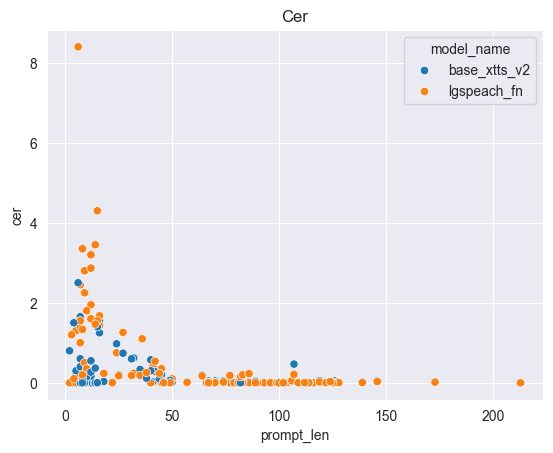

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.title('Cer')
sns.scatterplot(x='prompt_len', y='cer', data=grouped_df, hue='model_name')

<Axes: title={'center': 'Wer'}, xlabel='prompt_len', ylabel='wer'>

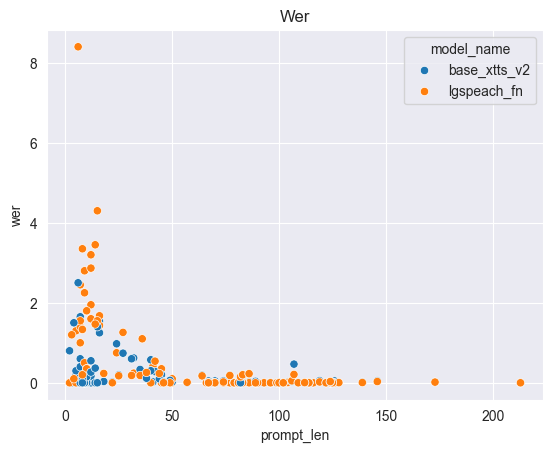

In [26]:
plt.title('Wer')
sns.scatterplot(x='prompt_len', y='wer', data=grouped_df, hue='model_name')

<Axes: title={'center': 'Secs'}, xlabel='prompt_len', ylabel='ref_secs'>

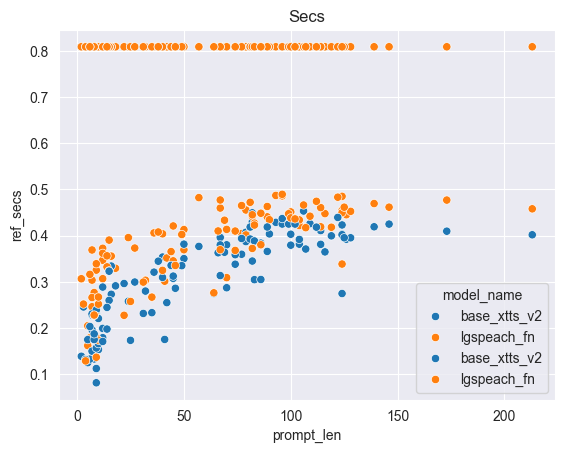

In [27]:
plt.title('Secs')
sns.scatterplot(x='prompt_len', y='ref_secs', data=grouped_df, hue='model_name')
sns.scatterplot(x='prompt_len', y='secs', data=grouped_df, hue='model_name')

<Axes: title={'center': 'UTMOS'}, xlabel='prompt_len', ylabel='utmos'>

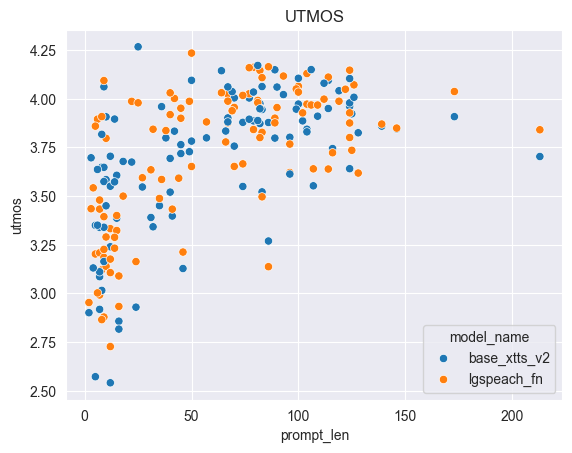

In [28]:
plt.title('UTMOS')
sns.scatterplot(x='prompt_len', y='utmos', data=grouped_df, hue='model_name')

In [3]:
dataset = pd.read_csv('../data/facebook_voxpopuli/metadata.csv', index_col=0)
dataset

,audio_id,language,raw_text,normalized_text,gender,speaker_id,is_gold_transcript,accent
0,20180418-0900-PLENARY-3-en_20180418-08:50:36_17,0,"If you do not address this problem, the ground...",if you do not address this problem the ground ...,female,124737,True,None
1,20170614-0900-PLENARY-5-en_20170614-10:03:08_5,0,they attacked and removed the voices of resist...,they attacked and removed the voices of resist...,male,124966,True,None
2,20180314-0900-PLENARY-13-en_20180314-16:03:18_3,0,In order to increase the preparedness at natio...,in order to increase the preparedness at natio...,female,None,True,None
3,20160413-0900-PLENARY-17-en_20160413-15:33:39_4,0,These are not easy issues to resolve.,these are not easy issues to resolve.,male,28497,True,None
4,20170215-0900-PLENARY-4-en_20170215-10:17:28_5,0,So it is a good deal.,so it is a good deal.,male,96912,True,None
...,...,...,...,...,...,...,...,...
19348,20101215-0900-PLENARY-4-en_20101215-11:11:01_22,16,according to our suggestions it is very import...,according to our suggestions it is very import...,na,23805,True,en_hu
19349,20180117-0900-PLENARY-16-en_20180117-16:30:34_7,16,there is a to go back to the roots of classica...,there is a to go back to the roots of classica...,na,129073,True,en_et
19350,20170614-0900-PLENARY-17-en_20170614-18:43:05_2,16,conclude saying that taking decisions closer t...,conclude saying that taking decisions closer t...,na,97203,True,en_es
19351,20110406-0900-PLENARY-18-en_20110406-21:02:34_4,16,I have read both Mario David's report on the h...,i have read both mario david's report on the h...,na,101465,True,en_cs


In [13]:
dataset[dataset['speaker_id'].isin(['4525', '197469'])].groupby(['speaker_id']).sample(1)

,audio_id,language,raw_text,normalized_text,gender,speaker_id,is_gold_transcript,accent
11506,20190919-0900-PLENARY-en_20190919-11:12:13_6,16,"Since January, 2018 32 people were arrested in...",since january two thousand and eighteen thirty...,na,197469,True,en_nl
7026,20110307-0900-PLENARY-11-en_20110307-17:39:33_9,0,"Maybe, if we vote for this tomorrow, it will b...",maybe if we vote for this tomorrow it will be ...,male,4525,True,None


In [16]:
speakers = pd.read_csv('../data/facebook_voxpopuli/speakers.csv')

In [17]:
speakers

,audio_id,language,raw_text,normalized_text,gender,speaker_id,is_gold_transcript,accent,processed
0,20180207-0900-PLENARY-8-en_20180207-12_30_56_3,16,and a lot of colleagues have voted as this wa...,and a lot of colleagues have voted as this was...,na,96892,True,en_it,True
1,20090505-0900-PLENARY-3-en_20090505-09_33_26_0,16,Thank you very much. I think it's fascinating...,for one minute maku i think it's fascinating t...,na,1898,True,en_de,True


In [22]:
pd.concat([speakers, dataset[dataset['speaker_id'].isin(['4525', '197469'])].groupby(['speaker_id']).sample(1, random_state=42)]).to_csv('../data/facebook_voxpopuli/speakers.csv', index=False)